# Importando pacotes 

In [73]:
# analíse explorátoria e limpeza de dados
import pandas as pd 

# plotagem de gráficos
import matplotlib.pyplot as plt 

# Carregando os dados

In [76]:
df = pd.read_csv(r"C:\Users\renil\Desktop\Projetos\Spotify_2024_Global_Streaming_Data.csv")

# Vizualizando as 10 primeiras linhas

In [79]:
df.head(10)

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82
5,Sweden,Billie Eilish,Happier Than Ever,Indie,2019,37.65,1087.06,3298.09,4.37,Free,122.22,7.67
6,France,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,Rock,2021,27.72,4630.69,17950.05,2.94,Premium,168.73,31.26
7,France,Doja Cat,Scarlet,Pop,2020,40.72,377.63,1633.73,3.63,Premium,43.31,20.47
8,Sweden,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,K-pop,2019,25.42,2828.77,8558.40,3.67,Premium,73.04,39.90
9,United Kingdom,Ariana Grande,Eternal Sunshine,Rock,2018,75.82,4312.46,12099.39,2.82,Premium,119.69,16.01


# Procurando por dados duplicados e faltantes

In [82]:
df.duplicated().value_counts()

False    500
Name: count, dtype: int64

In [84]:
df.isnull().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

como podemos observar, o dataset não apresenta dados faltantes para atrapalhar as análises, então vamos a esta etapa

# Análise exploratória

## Estilo mais ouvido por país

In [89]:
genero_por_pais = pd.crosstab(df['Country'] , df['Genre'])

styled_table = genero_por_pais.style.background_gradient(cmap= 'coolwarm')
display(styled_table)

Genre,Classical,EDM,Hip Hop,Indie,Jazz,K-pop,Pop,R&B,Reggaeton,Rock
Country,,,,,,,,,,
Argentina,3,1,2,1,2,7,5,1,2,3
Australia,0,3,0,3,1,2,1,0,2,0
Brazil,4,1,4,4,3,2,6,2,2,2
Canada,6,3,4,3,0,2,2,1,1,3
France,3,3,4,2,3,2,1,1,1,3
Germany,0,3,3,2,1,2,1,3,3,2
India,3,3,1,1,2,2,3,2,3,2
Indonesia,3,4,1,4,3,3,1,3,1,2
Italy,5,5,4,2,2,3,3,4,3,3


## Artistas mais ouvidos 

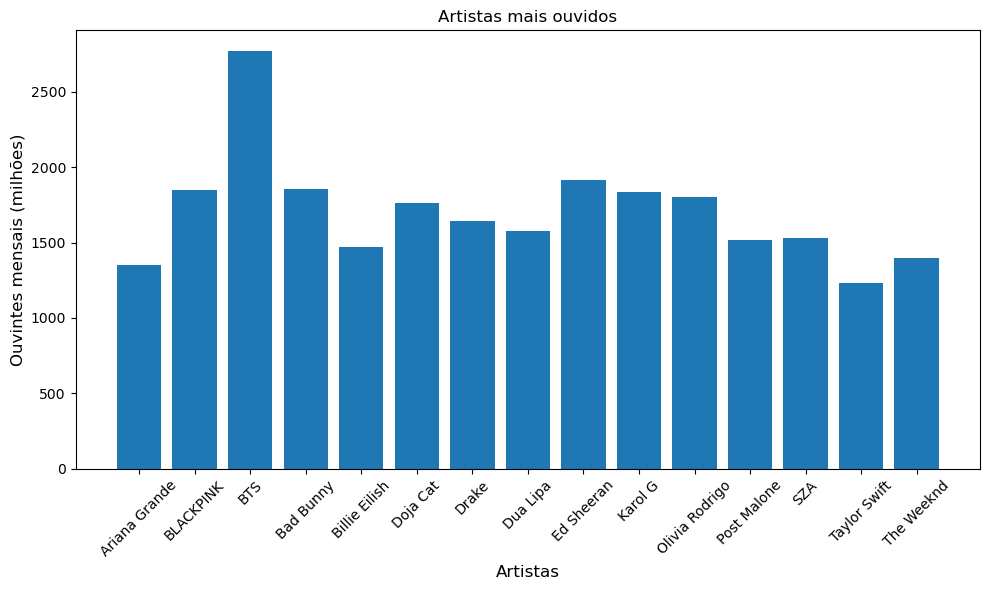

In [92]:
artista_mais_ouvidos = df.groupby('Artist')['Monthly Listeners (Millions)'].sum()

fig, ax = plt.subplots(figsize= (10, 6))
ax.bar(artista_mais_ouvidos.index, artista_mais_ouvidos.values)

ax.set_xlabel('Artistas' , fontsize= 12)
ax.set_ylabel('Ouvintes mensais (milhões)' , fontsize= 12)
ax.set_title('Artistas mais ouvidos', fontsize= 12)
plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()


## Artistas mais ouvidos por país

In [94]:
artista_por_pais = pd.crosstab(df['Artist'] , df['Country'])

styled_table = artista_por_pais.style.background_gradient(cmap='coolwarm')
display(styled_table)

Country,Argentina,Australia,Brazil,Canada,France,Germany,India,Indonesia,Italy,Japan,Mexico,Netherlands,Russia,South Africa,South Korea,Spain,Sweden,Turkey,United Kingdom,United States
Artist,,,,,,,,,,,,,,,,,,,,
Ariana Grande,3,0,4,1,1,0,1,1,3,0,1,1,2,1,0,2,1,2,2,1
BLACKPINK,2,0,4,0,3,1,3,0,2,3,1,2,2,2,3,1,2,2,1,3
BTS,0,1,5,0,1,1,7,6,1,2,0,2,0,5,3,2,4,2,1,1
Bad Bunny,1,1,1,1,2,2,0,3,2,2,4,3,1,5,2,1,3,2,2,2
Billie Eilish,1,0,1,2,1,0,0,3,2,1,2,4,1,4,2,2,1,2,1,1
Doja Cat,5,1,1,3,2,3,0,1,1,3,0,0,3,0,3,1,4,2,0,1
Drake,2,0,1,4,2,2,1,1,3,0,1,1,1,2,1,0,2,2,3,2
Dua Lipa,3,1,2,5,1,0,2,2,1,0,0,0,4,1,7,2,1,1,2,2
Ed Sheeran,0,1,3,0,3,1,2,3,5,3,3,1,3,1,1,1,0,2,0,2


## Álbum mais ouvido

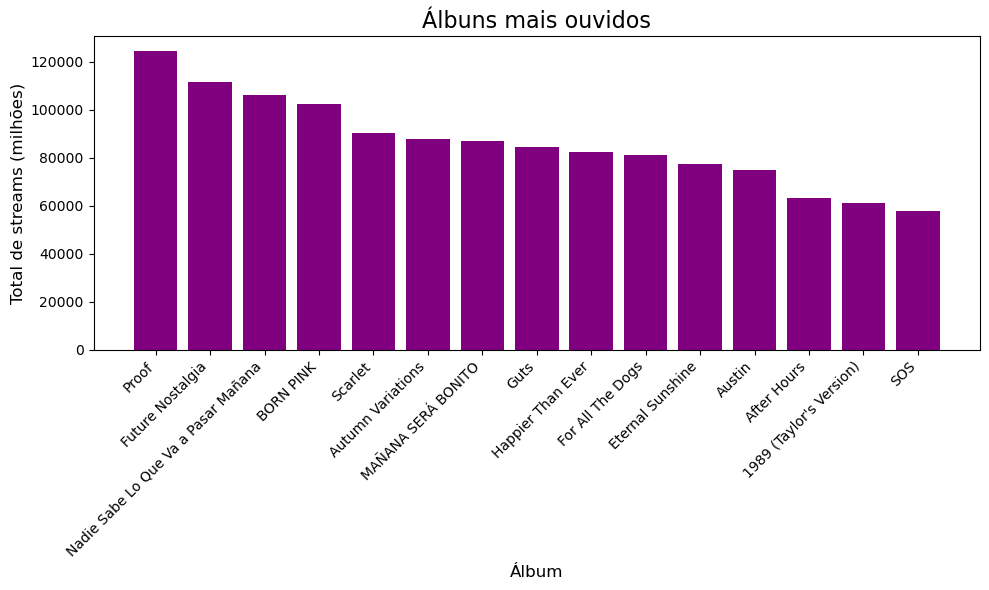

In [119]:
albuns_mais_ouvidos = df.groupby('Album')['Total Streams (Millions)'].sum()

albuns_mais_ouvidos = albuns_mais_ouvidos.sort_values(ascending= False)

fig, ax = plt.subplots(figsize= (10, 6))
ax.bar(albuns_mais_ouvidos.index, albuns_mais_ouvidos.values, color='purple')

ax.set_xlabel('Álbum', fontsize= 12)
ax.set_ylabel('Total de streams (milhões)' , fontsize= 12)
ax.set_title('Álbuns mais ouvidos', fontsize= 16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Albuns que foram mais pulados

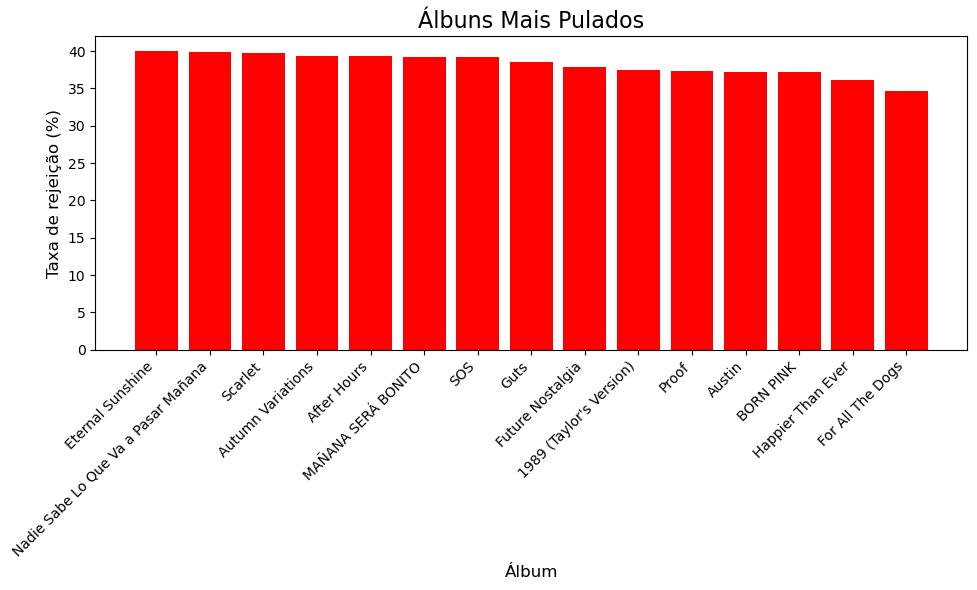

In [100]:
albuns_mais_pulados = df.sort_values(by= 'Skip Rate (%)', ascending=False)


fig, ax = plt.subplots(figsize= (10, 6))
ax.bar(albuns_mais_pulados['Album'], albuns_mais_pulados['Skip Rate (%)'], color='red')


ax.set_xlabel('Álbum', fontsize= 12)
ax.set_ylabel('Taxa de rejeição (%)', fontsize= 12)
ax.set_title('Álbuns Mais Pulados', fontsize= 16)
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

# Agora, vamos fazer algumas analises em relação a assinatura Premium

## Quais albuns mais ouvidos por usuários gratuitos

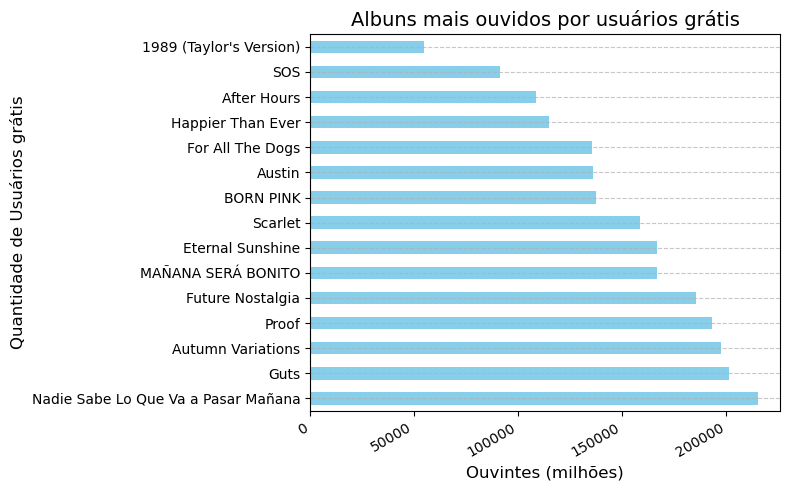

In [105]:
usuarios_gratuitos = df[df["Platform Type"] == "Free"]

albuns_gratis = usuarios_gratuitos.groupby("Album")["Total Hours Streamed (Millions)"].sum().sort_values(ascending= False)

plt.figure(figsize= (8, 5))
albuns_premium.plot(kind="barh", color="skyblue")
plt.title("Albuns mais ouvidos por usuários grátis", fontsize= 14)
plt.xlabel("Ouvintes (milhões)", fontsize= 12)
plt.ylabel("Quantidade de Usuários grátis", fontsize= 12)
plt.xticks(rotation= 30, ha= 'right', fontsize=10 )
plt.grid(axis='y', linestyle='--', alpha= 0.7)

plt.tight_layout()
plt.show()

## Albuns mais ouvidos por premiums

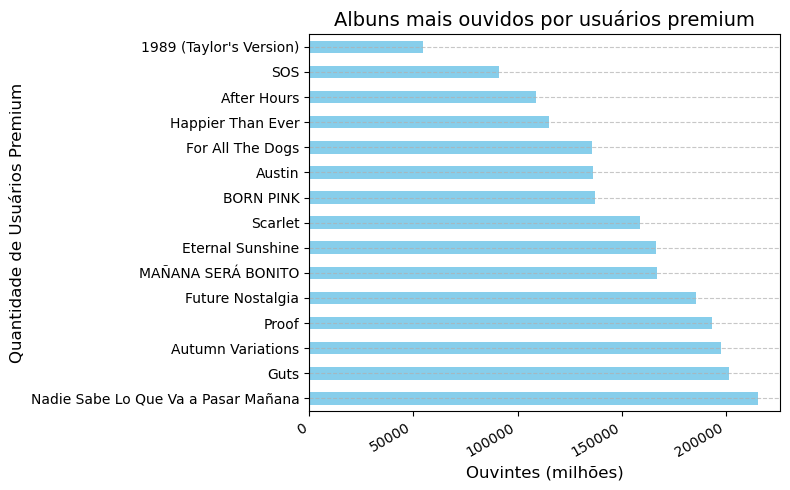

In [108]:
usuarios_premium = df[df["Platform Type"] == "Premium"]

albuns_premium = usuarios_premium.groupby('Album')["Total Hours Streamed (Millions)"].sum().sort_values(ascending=False)

plt.figure(figsize=( 8, 5))
albuns_premium.plot(kind="barh", color="skyblue")
plt.title("Albuns mais ouvidos por usuários premium", fontsize= 14)
plt.xlabel("Ouvintes (milhões)", fontsize= 12)
plt.ylabel("Quantidade de Usuários Premium", fontsize= 12)
plt.xticks(rotation= 30, ha= 'right', fontsize=10 )
plt.grid(axis='y', linestyle='--', alpha= 0.7)

plt.tight_layout()
plt.show()

## País com mais contas premium

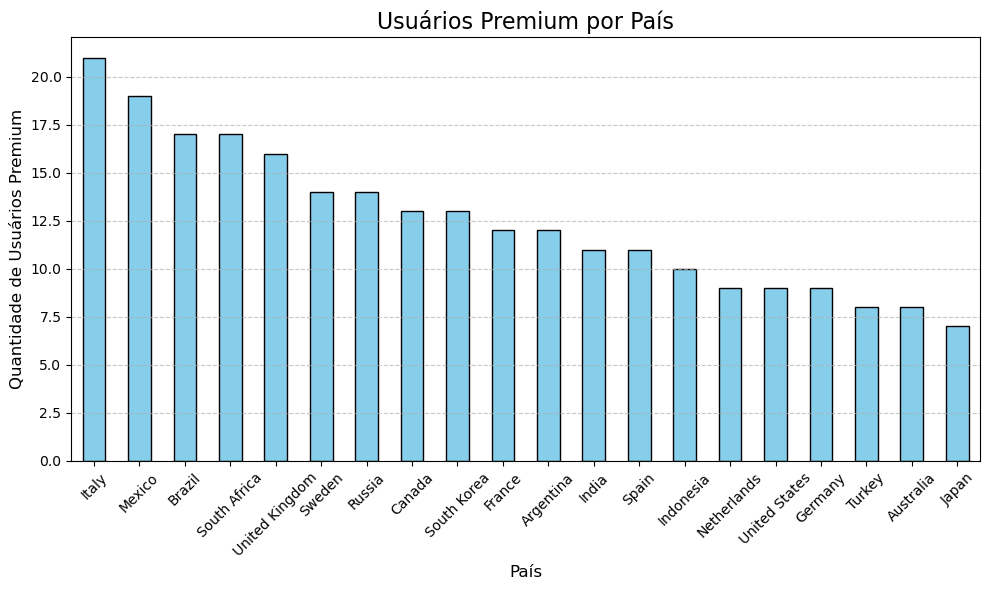

In [132]:
usuarios_premium = df[df["Platform Type"] == "Premium"]
contas_premium = usuarios_premium["Country"].value_counts()

plt.figure(figsize= (10, 6))
contas_premium.plot(kind="bar", color= "skyblue", edgecolor= "black")

plt.title("Usuários Premium por País", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Quantidade de Usuários Premium", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## País com mais usuarios gratuitos

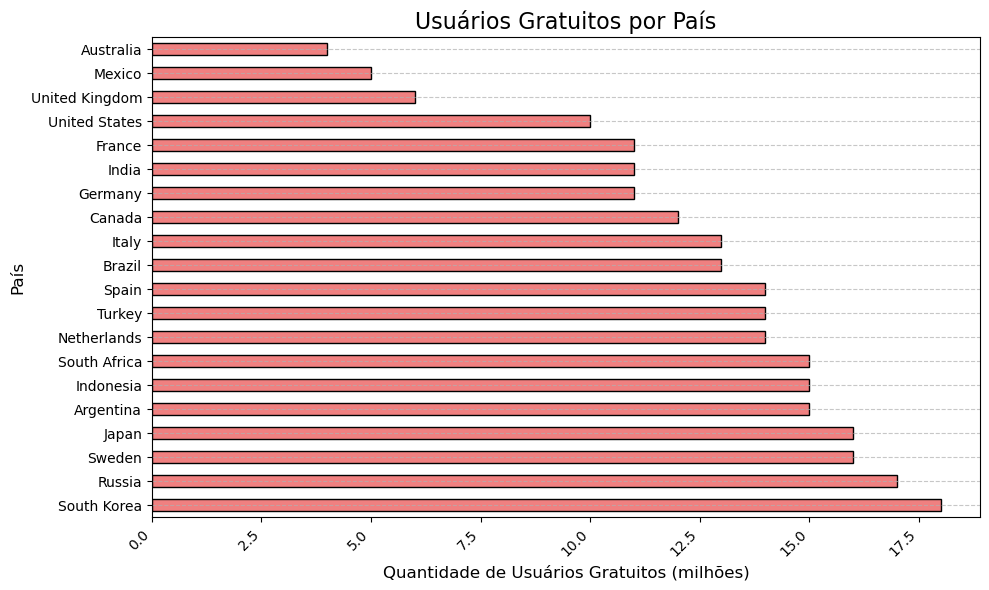

In [152]:
usuarios_gratuitos = df[df["Platform Type"] == "Free"]
contas_gratuitas = usuarios_gratuitos["Country"].value_counts()

plt.figure(figsize= (10, 6))
contas_gratuitas.plot(kind = "barh", color = "lightcoral", edgecolor= "black")

plt.title("Usuários Gratuitos por País", fontsize= 16)
plt.xlabel("Quantidade de Usuários Gratuitos (milhões)", fontsize= 12)
plt.ylabel("País", fontsize= 12)
plt.xticks(rotation=45, ha= 'right')
plt.grid(axis= 'y', linestyle= '--', alpha= 0.7)

plt.tight_layout()
plt.show()

# Conclusão
## A partir da exploração destes dados, chegamos a algumas conclusões e podemos observar alguns pontos:

### Tendências regionais como por exemplo a forte influência de Kpop e Pop na Argetina e no Brasil e a forte forte influência do Hip hop no Japão.
### Artistas mais ouvidos, sendo os 3 mais ouvidos: Arianna Grande, BTS e Blackpink.
### Quais artistas são mais populares em cada país contido no conjunto de dados.
### Álbuns mais ouvidos, sendo os 3 mais ouvidos: Proof do BTS, Future Nostalgia da Dua Lipa e nadie sabe lo que va a pasar mañana do Bad Bunny.
### Quais são os albuns mais pulados sendo os 3 mais pulados: Eternal Sunshine da Ariana Grande, em segundo Nadie sabe lo que va a pasar mañana e Scarlet da Doja Cat.
### Os países com mais usuários gratuitos, sendo os 3 primeiros: Coreia do Sul, Russia e Suéçia.
### Os países com mais usuários premium, snedo eles: Itália, México e Brasil
### Os álbuns mais ouvidos por usuários gratuitos, sendo os 3 primeiros: Nadie sabe lo que va a pasar mañana, Guts da Olivia Rodrigo e Autumn Variations do Ed Sheeran
### E também os mais ouvidos pelos premiums, sendo os 3 primeiros Nadie sabe lo que va a pasar mañana, Guts e Autumn Variations.